<pre><h2 style="color:#48d1cc">                        Flight Delay Predictors from Aviation Data</h2></pre>

<pre style="font-family:cursive;font-size:20px">                               Builiding an analysis report to understand what factors most impact flight delays</pre>

<h4>Importing Libraries</h4>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

<h4>Reading the Dataset</h4>

In [10]:
file=pd.read_csv('airline_delay.csv')
print(f"File read successfully")

File read successfully


<h4>Getting information about the Dataframe</h4>

In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [12]:
file.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64

In [57]:
ndf.describe()

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.00000,3343.000000,3343.000000
mean,298.271014,50.995214,16.065337,1.443144,16.183383,0.137320,17.166069,2.884535,0.575830,3333.868083,1144.763087,177.591385,749.57942,5.400838,1256.533353
std,852.436335,146.484456,41.759516,4.821657,56.423008,0.646479,55.447043,10.126658,2.097884,10284.926623,3371.103512,734.343542,3190.50916,27.161402,4184.451426
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,5.000000,1.490000,0.000000,0.820000,0.000000,0.900000,0.000000,0.000000,230.000000,68.500000,0.000000,21.50000,0.000000,31.000000
50%,83.000000,12.000000,4.750000,0.060000,2.980000,0.000000,3.280000,0.000000,0.000000,746.000000,272.000000,3.000000,106.00000,0.000000,205.000000
75%,194.500000,33.000000,12.255000,1.010000,8.870000,0.000000,10.240000,2.000000,0.000000,2095.500000,830.500000,82.000000,362.00000,0.000000,724.000000
max,19713.000000,2289.000000,697.000000,89.420000,1039.540000,17.310000,819.660000,224.000000,42.000000,160383.000000,55215.000000,14219.000000,82064.00000,553.000000,75179.000000


In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='year',y='popularity',data=df)
plt.title('Popularity Outliers')
plt.show()

In [15]:
ndf=file.loc[:,'arr_flights':'late_aircraft_delay']
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   arr_flights          3343 non-null   float64
 1   arr_del15            3343 non-null   float64
 2   carrier_ct           3343 non-null   float64
 3   weather_ct           3343 non-null   float64
 4   nas_ct               3343 non-null   float64
 5   security_ct          3343 non-null   float64
 6   late_aircraft_ct     3343 non-null   float64
 7   arr_cancelled        3343 non-null   float64
 8   arr_diverted         3343 non-null   float64
 9   arr_delay            3343 non-null   float64
 10  carrier_delay        3343 non-null   float64
 11  weather_delay        3343 non-null   float64
 12  nas_delay            3343 non-null   float64
 13  security_delay       3343 non-null   float64
 14  late_aircraft_delay  3343 non-null   float64
dtypes: float64(15)
memory usage: 392.8 KB


In [16]:
ndf.isnull().sum()

arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64

In [46]:
ndf.dropna(inplace=True)
ndf.isnull().sum()

arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

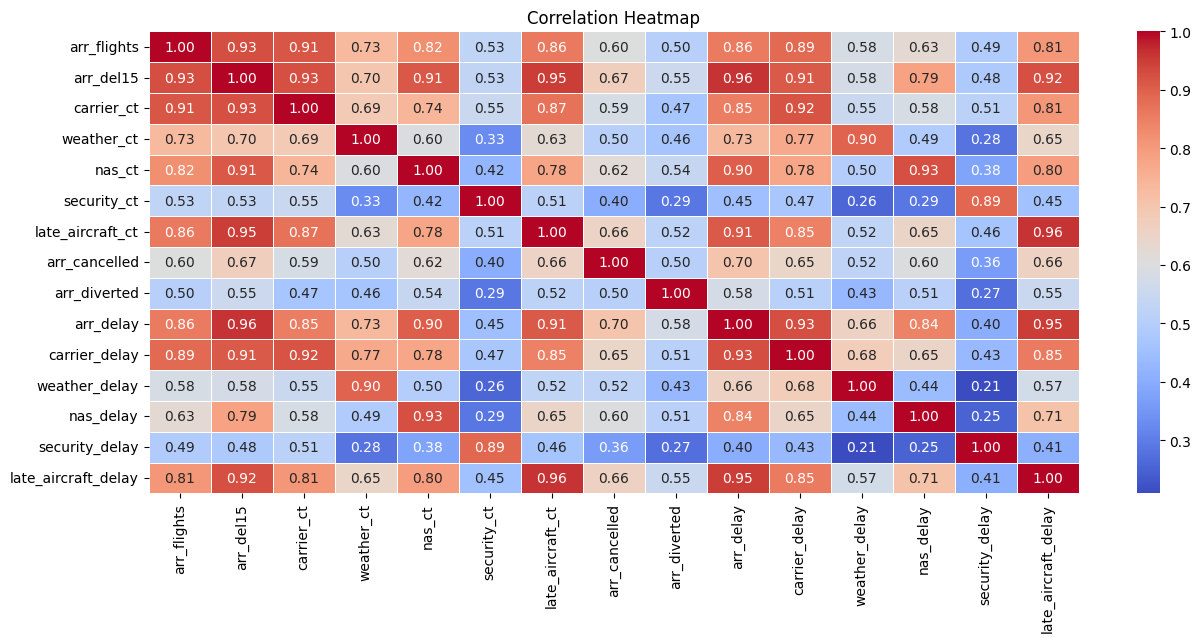

In [22]:
cmat=ndf.corr()
plt.figure(figsize=(15,6))
plt.title('Correlation Heatmap')
sns.heatmap(cmat,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.show()

In [40]:
del_al=file.groupby('carrier_name')['arr_del15'].mean().sort_values()
print(del_al)

carrier_name
Allegiant Air               14.500000
Frontier Airlines Inc.      19.858696
ExpressJet Airlines LLC     25.415094
Endeavor Air Inc.           25.929204
Hawaiian Airlines Inc.      27.891892
Envoy Air                   28.315789
Mesa Airlines Inc.          29.036530
PSA Airlines Inc.           38.299465
Republic Airline            40.469388
SkyWest Airlines Inc.       43.160752
Alaska Airlines Inc.        43.708333
Spirit Air Lines            51.752577
United Air Lines Inc.       70.670157
Delta Air Lines Inc.        74.853175
JetBlue Airways             86.358333
American Airlines Inc.      95.195980
Southwest Airlines Co.     168.939227
Name: arr_del15, dtype: float64


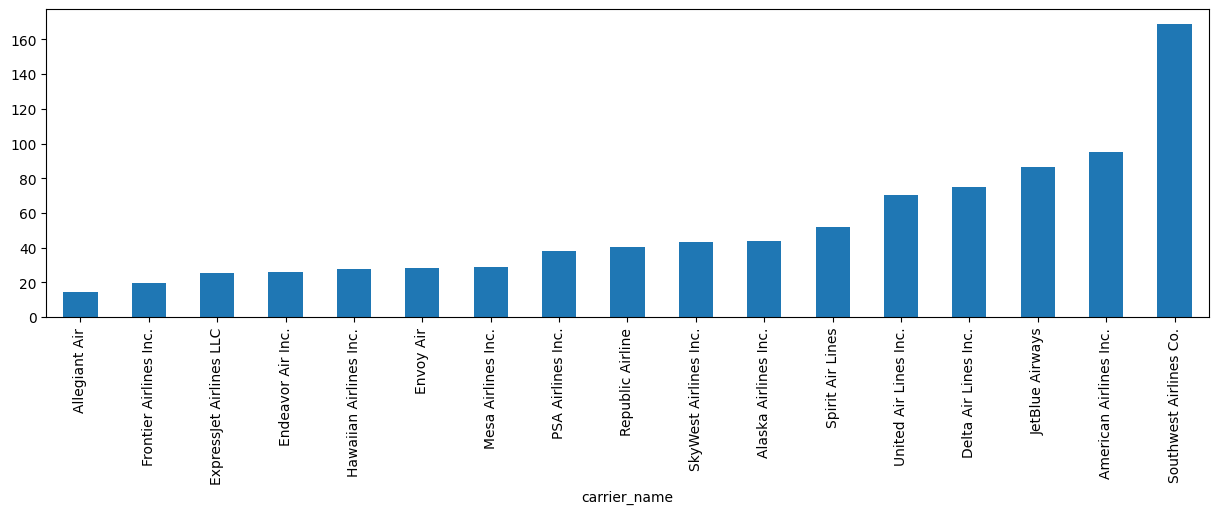

In [45]:
plt.figure(figsize=(15,4))
del_al.plot(kind='bar')
plt.show()

<pre style="font-size:15px">
    year = Year of data
    month = Month of data
    carrier = Carrier code
    carrier_name = Carrier name
    airport = Airport code
    airport_name = Airport name
    arr_flights = Number of arriving flights
    arr_del15 = Number of flights delayed by 15 minutes or more
    carrier_ct = Carrier count(delay due to carrier)
    weather_ct = Weather count(delay due to weather)
    nas_ct = NAS count(delay due to National Airspace System)
    security_ct = security count(delay due to security)
    late_aircraft_ct = Late aircraft count(delay due to late aircraft arrival)
    arr_cancelled = Number of flights cancelled
    arr_diverted = Number of flights diverted
    arr_delay = Total arrival delay
    carrier_delay = Delay attributed to the carrier
    weather_delay = Delay attributed to weather 
    nas_delay = Delay attributed to the NAS
    security_delay = Delay attributed to security
    late_aircraft_delay = Delay attributed to late aircraft arrival
</pre>

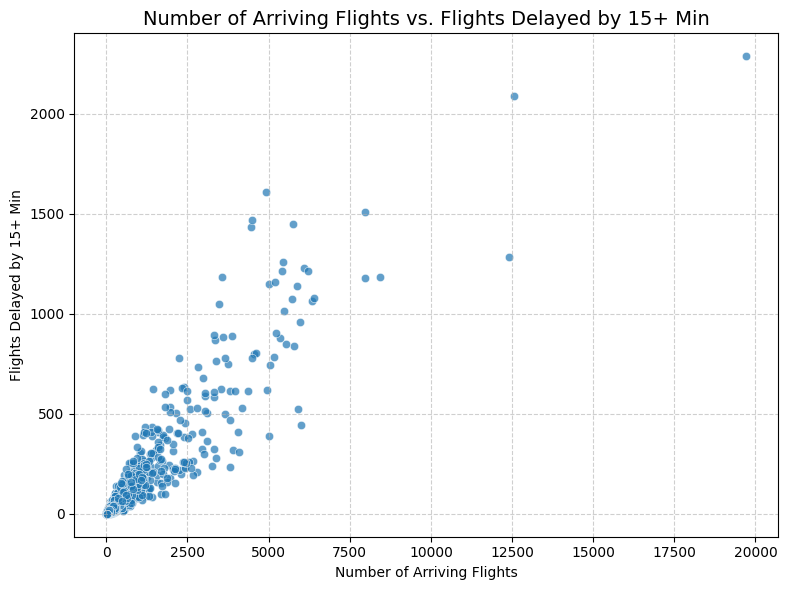

In [81]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='arr_flights', y='arr_del15', data=ndf, alpha=0.7)
plt.title('Number of Arriving Flights vs. Flights Delayed by 15+ Min', fontsize=14)
plt.xlabel('Number of Arriving Flights')
plt.ylabel('Flights Delayed by 15+ Min')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

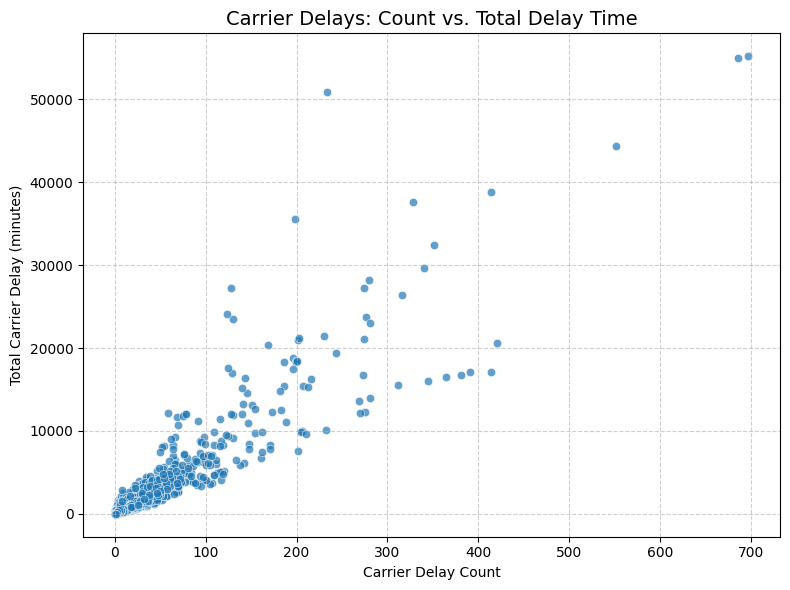

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carrier_ct', y='carrier_delay', data=ndf, alpha=0.7)
plt.title('Carrier Delays: Count vs. Total Delay Time', fontsize=14)
plt.xlabel('Carrier Delay Count')
plt.ylabel('Total Carrier Delay (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()